## Introduction

This colab notebook is used as a means to analyze the prepared data from my [Colab Data Preparation Notebook](https://github.com/varelandrew/Education/blob/main/Andrew_Varela_DATA_3320_Education_Inequality_Data_Preparation_Template.ipynb) sourced from [Edgap](https://www.edgap.org/#4/37.86/-97.03) and [NCES](https://nces.ed.gov/ccd/pubschuniv.asp) for average testing data for ACT scores as well as school and socioeconomic factors. The question that I am trying to answer is whether ACT performance is related to socioeconomic factors. I will be stating any questions, analyzing the results, and concluding with a statement based on my findings.

If you would like to dive deeper into the specific data sets used, here are links to the resources.
- [Edgap Data Set](https://github.com/varelandrew/Education/blob/main/EdGap_data.xlsx)
- [NCES Data Set](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf

## Load Clean Data

$\rightarrow$ Loading the clean data set from my [Github](https://github.com/varelandrew/Education)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Education/main/clean_education.csv')

$\rightarrow$ Reviewing the contents of the data set.

In [3]:
df

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
0,53519.0,0.515772,0.317196,0.578737,0.106499,High,Regular School,MO,2016-2017,63016,21.000000
1,20787.0,0.820817,0.117472,0.714286,0.088530,High,Regular School,PA,2016-2017,16801,24.255189
2,35096.0,0.544144,0.627420,0.319083,0.128492,High,Regular School,NY,2016-2017,10475,16.489621
3,31894.0,0.353052,0.457844,0.658269,0.091566,High,Regular School,TX,2016-2017,79603,20.225885
4,56516.0,0.682066,0.292994,0.616460,0.071318,High,Regular School,NC,2016-2017,27954,21.031746
...,...,...,...,...,...,...,...,...,...,...,...
5776,131844.0,0.869429,0.022876,0.860172,0.103933,High,Regular School,NJ,2016-2017,7090,25.647131
5777,54556.0,0.606914,0.322670,0.511664,0.072570,High,Regular School,MI,2016-2017,49321,19.700000
5778,57750.0,0.745595,0.520998,0.805622,0.124047,High,Regular School,GA,2016-2017,30078,18.907204
5779,50825.0,0.684533,0.512111,0.881620,0.076837,High,Regular School,TN,2016-2017,37920,18.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5781 non-null   float64
 1   percent_college    5781 non-null   float64
 2   percent_lunch      5781 non-null   float64
 3   percent_married    5781 non-null   float64
 4   rate_unemployment  5781 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   int64  
 10  average_act        5781 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 496.9+ KB


## State Your Questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors.

$\rightarrow$ Here are a list of my questions about the data that will help me solve the problem listed above.

1.  Which variables from the clean data set have a high coorelation with average school ACT performance?
2. What variables are the best predictors for determining average school ACT performance?
3. How much influence do these variables actually have on affecting the average school ACT performance?

## Analysis

Here I am making a pair plot of all the measureable data in the clean data set to visually see what type of coorelations each data set has.

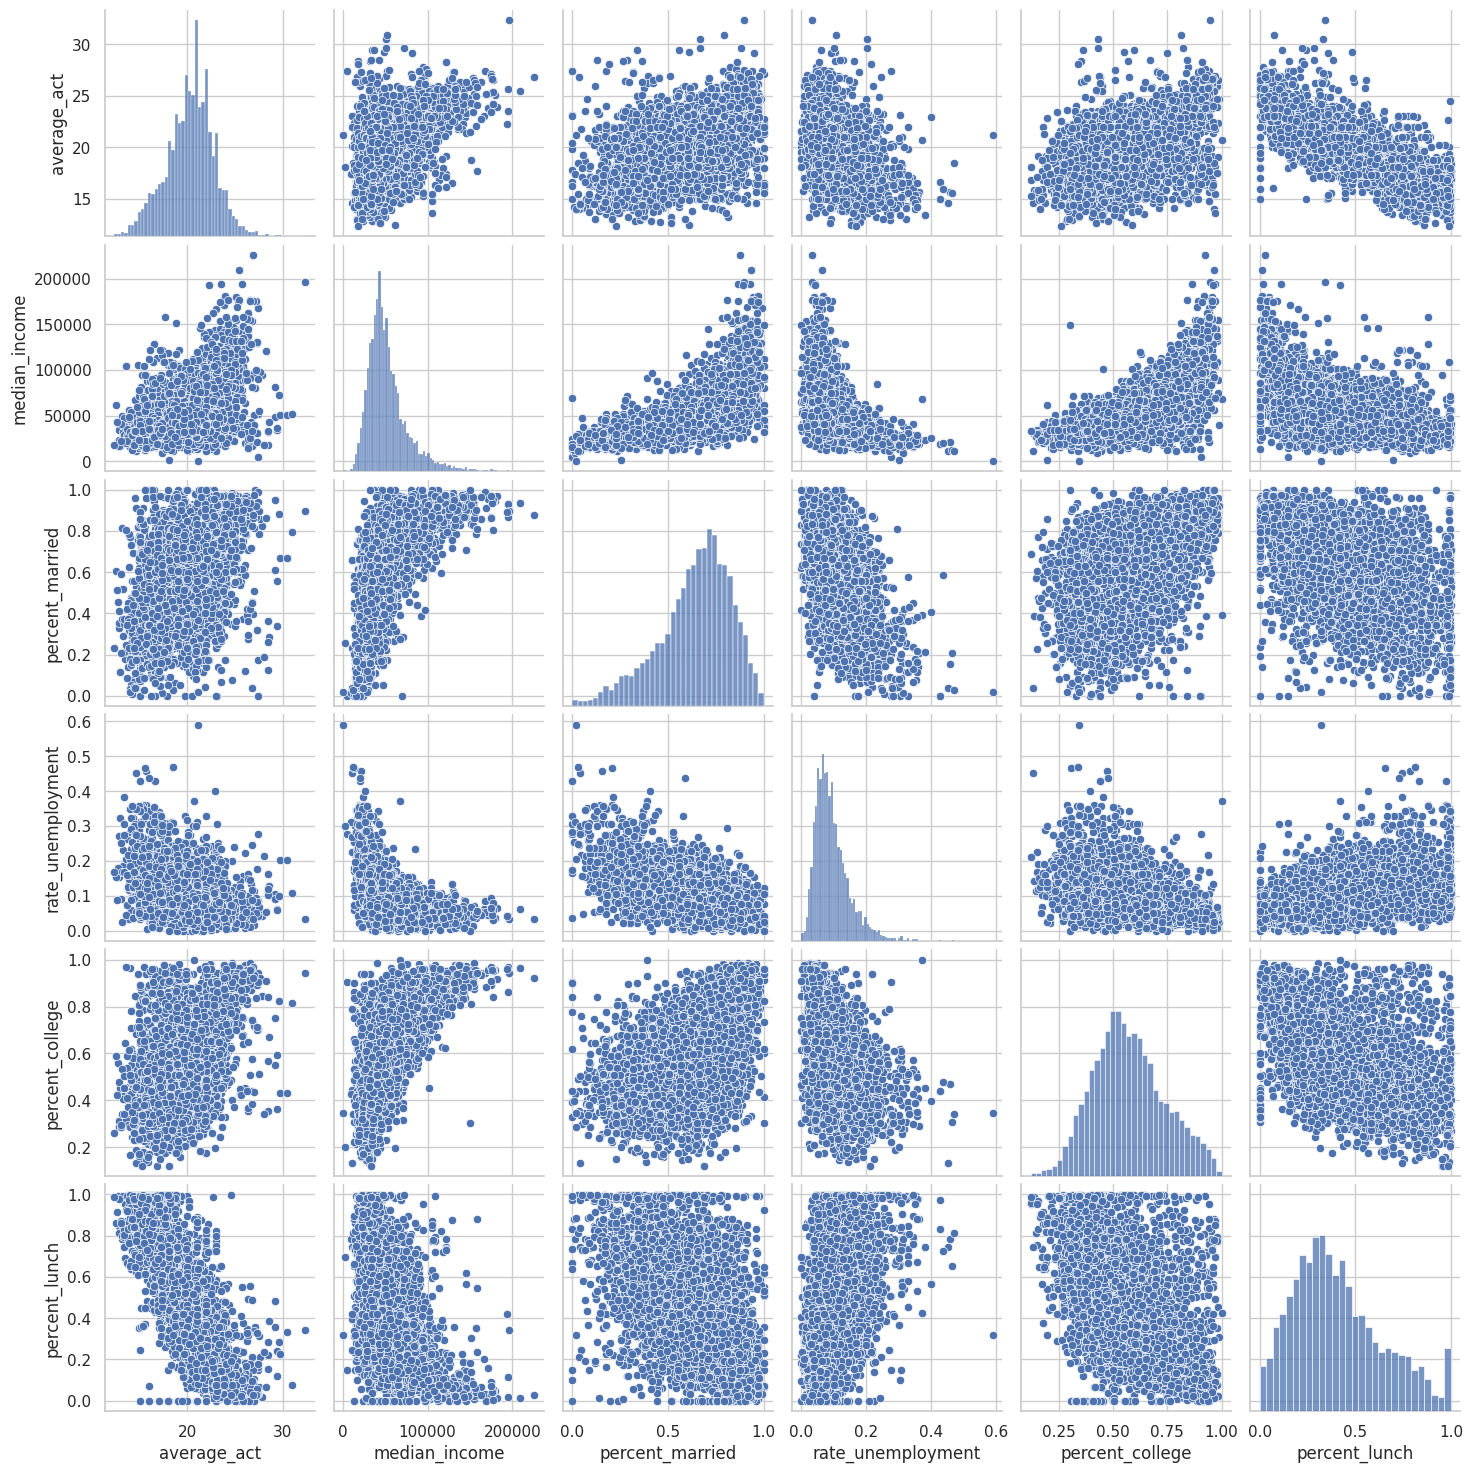

In [5]:
sns.pairplot(data = df.loc[:,['average_act', 'median_income', 'percent_married', 'rate_unemployment', 'percent_college', 'percent_lunch']])

There are a lot of plots here, but mainly I am focusing on the top row that shows the coorelation between the average ACT score and all of the other measureable data values. You can see that out of all the plots percent lunch and average ACT is the only plot that showcases a somewhat linear/quadratic visualization which peaks my interest for further investigating later on.

Here I am performing a correlation matrix visualization that showcases the strength and direction of the linear relationship between two variables.

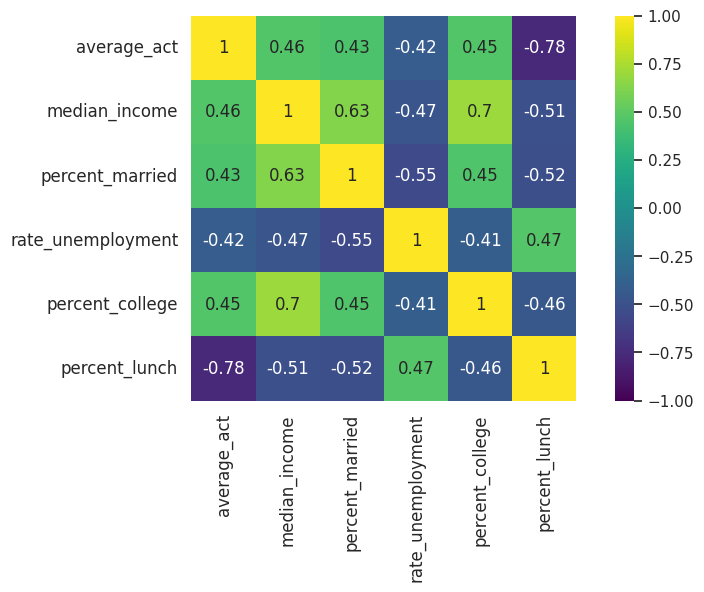

In [6]:
corr_matrix = df.loc[:,['average_act', 'median_income', 'percent_married', 'rate_unemployment', 'percent_college', 'percent_lunch']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

The biggest piece to learn from this visualization is percent lunch and average ACT have a big negative correlation up to -0.78 which reflects the visualization above because as the number of students that need lunch provided for them at school goes up the average ACT score goes down. 

Here we are preforming a summary output of the linear regression model between the average ACT score and all of the measureable values in the data set. To see what variables are significant to the average ACT score. 

In [7]:
model0 = smf.ols(formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data=df).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1886.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:04:21   Log-Likelihood:                -10706.
No. Observations:                5781   AIC:                         2.142e+04
Df Residuals:                    5775   BIC:                         2.146e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7746      0.15

Noticeable information to point out here is the R-squared value which shows that 62% of the variance in the average ACT score can be explained by the independent variables included in the model. Then the p-value also shows if a variable is statistically significant to the average ACT score and here you can see that rate_unemployment, percent_college, and percent_lunch all of high significance because there p-value is 0.000. Percent_married is close to being significant but the p-value is a bit high as well as median_income. 

Here we are preforming a summary output of the linear regression model between the average ACT score and percent lunch, because we notice from the previous visualizations and model that percent lunch has a noticeable correlation with the average ACT score.

In [8]:
model1 = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     8915.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:04:21   Log-Likelihood:                -10806.
No. Observations:                5781   AIC:                         2.162e+04
Df Residuals:                    5779   BIC:                         2.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7273      0.042    570.115

There is a lot of information here but information to point out is the R-squared value which indicates the proportion of variance in the average ACT score that is explained by the percent lunch value. Here it is 60.7% which is extremely high, when 62% is the total percentage of variance by all of the measureable values. The p-value being 0.000 also shows that the percent lunch value is statistically significant when it comes to the average ACT score.

Here I am plotting the relationship between percent_lunch and the average_act, where I have to regression lines: the blue represents a linear regression, and the orange line represents a quadratic regression.

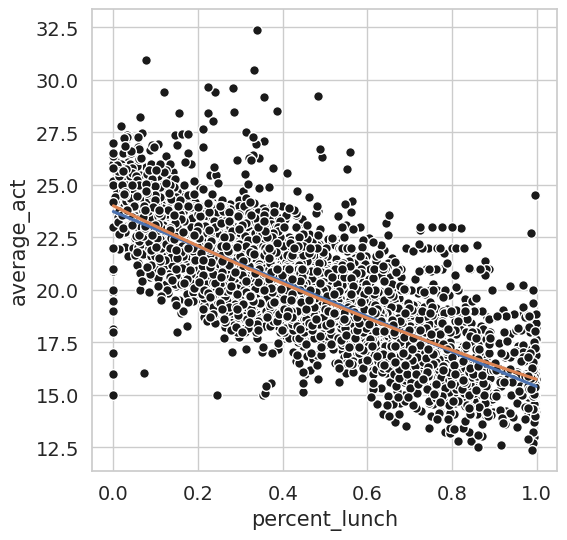

In [9]:
plt.figure(figsize=(6,6))

plt.plot(df['percent_lunch'], df['average_act'], 'ko', mec ='w', ms=7)

sns.regplot(data=df, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)
sns.regplot(data=df, x = 'percent_lunch', y = 'average_act', order=2, scatter=False, ci=None)

plt.xlabel('percent_lunch', fontsize=15)
plt.ylabel('average_act', fontsize=15)

plt.tick_params(labelsize=14);

The plot reinforces the negative relationship between the percent_lunch and average_act scores. Since there is a little curve in the quadratic regression line we can dive a little deeper into it to see what type of relationship there is.

Here we predicted the average_act scores based on the polynomial regression model with percent_lunch and percent_lunch**2 as predictors.

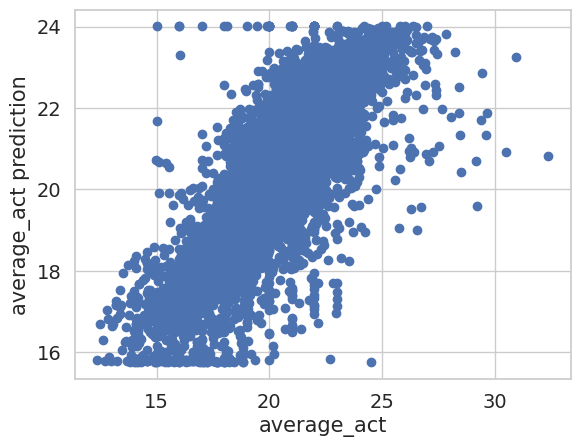

In [10]:
model2 = smf.ols(formula='average_act ~ percent_lunch + I(percent_lunch**2)', data=df).fit()
y_prediction2 = model2.predict()
plt.plot(df['average_act'], y_prediction2, 'o')

plt.xlabel('average_act', fontsize=15)
plt.ylabel('average_act prediction', fontsize=15)

plt.tick_params(labelsize=14);

The plot here compares the predicted values with the actual values and since the points on the plot closely creates a diagonal line it indicates that the model's perdictions are similar to the actual values.

## Subsets

Here the following lines of code relates to the setup process of finding the best subset selection. Where we import some necessary libraries, indicate X and Y variables, and create a name variable for future use.

In [11]:
from itertools import combinations
from math import comb
import statsmodels.api as sm

In [12]:
X = df.loc[:, 'median_income':'rate_unemployment']
Y = df['average_act']

In [13]:
variable_names = X.columns.tolist()

The following two blocks of code are putting everything together to find the best subset model. Here I am following a 2-step process that looks like this:
1. For k = 1,2,...,p Fit all (p k) models that contain exactly k predictors. Pick the best among these (p k) models, and call it Mk. Here best is defined as having the smallest RSS, or equivalently largest R^2.
2. Select a single best model from among M0, ..., Mp using cross-validated prediction error, AIC (Cp), BIC, or adjusted R^2

In [14]:
models = {}
n = len(Y)
for k in range(1, len(variable_names) + 1):
  for subset in combinations(variable_names, k):
    predictors = X[list(subset)]
    model = sm.OLS(Y, sm.add_constant(predictors)).fit()
    bic = model.bic
    models[subset] = {"bic": bic}

best_model = None
best_bic = float('inf')
for k in range(1, len(variable_names) + 1):
  for subset in combinations(variable_names, k):
    predictors = X[list(subset)]
    model = sm.OLS(Y, sm.add_constant(predictors)).fit()
    bic = model.bic
    if bic < best_bic:
      best_model = {"predictors": subset, "bic": bic}
      best_bic = bic

print(best_model)

{'predictors': ('percent_college', 'percent_lunch', 'rate_unemployment'), 'bic': 21448.43270715932}


I used different variables than the ones listed in the steps that I followed, but the premise is the same. I ended up using the BIC value(Measure of how well the predictors fit the model) when calculating the best subset. What is outputted here is the best subset of predictors that explains the variation in the average_act score which are percent_college, percent_lunch, and rate_unemployment where the three predictors explain about 62% of the total variation for average_act scores which aligns with our previous findings in the analysis.

To better visualize how much the best predictors change the average ACT score we can take a new model and analyze just the best subset and its affects on a school's performance when it comes to an average ACT score compared to the original model with all of the predictors.

In [34]:
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1886.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:26:12   Log-Likelihood:                -10706.
No. Observations:                5781   AIC:                         2.142e+04
Df Residuals:                    5775   BIC:                         2.146e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7746      0.15

In [16]:
model_best_subset = smf.ols(formula='average_act ~ rate_unemployment + percent_college + percent_lunch', data=df).fit()
print(model_best_subset.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3142.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:04:23   Log-Likelihood:                -10707.
No. Observations:                5781   AIC:                         2.142e+04
Df Residuals:                    5777   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6185      0.11

The difference in summaries can show us a few things:
The best predictors all have P-values of 0.0 showing that they have a high significant effect on the average_act score where as median_income and percent_married both had values greater than 0.1.​

The F-statistic value which test the overall significance of the model in the original model was 1886 while the best subset model had a F-statistic value of 3142. This proves even further that the best predictors I found have a higher significance on affecting the average_act score.​

Here I take the best subset of predictors and calculate the z-score of the predictor variable to be able to better compare the coefficient variables. As the coefficient variable are relatively smaller in the original model.

In [21]:
df['percent_college_z'] = (df['percent_college'] - np.mean(df['percent_college']))/(np.std(df['percent_college'])*10)
df['percent_lunch_z'] = (df['percent_lunch'] - np.mean(df['percent_lunch']))/(np.std(df['percent_lunch'])*10)
df['rate_unemployment_z'] = (df['rate_unemployment'] - np.mean(df['rate_unemployment']))/(np.std(df['rate_unemployment'])*10)
model_z = smf.ols(formula='average_act ~ percent_college_z + percent_lunch_z + rate_unemployment_z', data=df).fit()
print(model_z.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3142.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:05:39   Log-Likelihood:                -10707.
No. Observations:                5781   AIC:                         2.142e+04
Df Residuals:                    5777   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.3147    

This visualization is meant to showcase the coefficient values and how big they differ. The coefficient value represents the change in the dependent variable (average ACT) that is associated with a one-unit change in the independent variable (best subset predictors). So for example, with my z-score model for every one standard deviation increase in the percent of the population that needs reduced/free lunch, the average ACT score is expected to decrease by about 17.7 points.

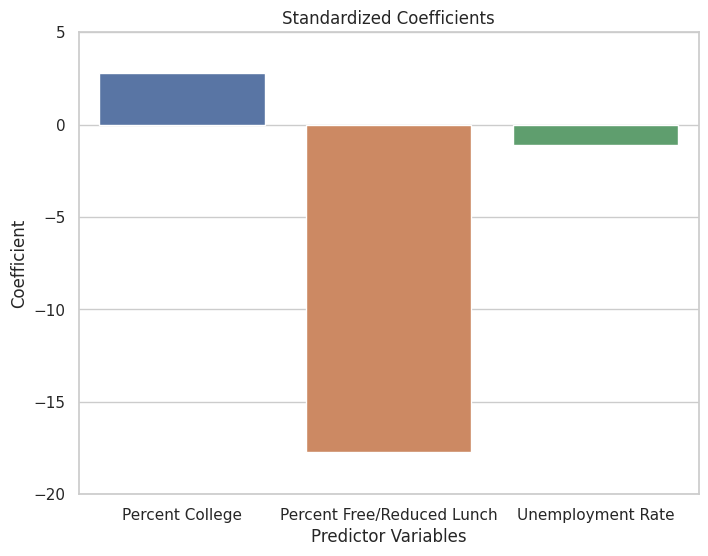

In [33]:
coef = model_z.params[1:]

plt.figure(figsize=(8, 6))
sns.barplot(x=['Percent College', 'Percent Free/Reduced Lunch', 'Unemployment Rate'], y=coef)
plt.title('Standardized Coefficients')
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient')
plt.ylim(-20, 5)
plt.show()

This visualization showcases how much free/reduced lunch affects a school's average ACT performance. This can tell us that by far my percent_lunch variable is the best predictor for predicting the average ACT score while percent college and unemployment rate are good predictors, they aren't the best. 

## Additional Proposal

We were tasked with trying to answer an additional question. I decided to see how a state/location has an affect on socioeconomic factors or a school's average ACT performance.

Luckily, I don't need to source any new data as the cleaned data set I imported in already has information on where the school's is located by state.

### Analysis

We want to add the categorical variable states as a predictor to discover if the relationship between our best predictor from the previous analysis percent_lunch and average ACT differ for schools from different states.
Here I am fitting the model using C(state) as a predictor. This allows the intercept to change between states.

In [19]:
model_test = smf.ols(formula='average_act ~ percent_lunch + C(state)', data=df).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     558.3
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:04:26   Log-Likelihood:                -10388.
No. Observations:                5781   AIC:                         2.082e+04
Df Residuals:                    5760   BIC:                         2.096e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.0813      0.313     64.

Some things to note from this summary are the R-Squared value which is at 66% which is 4% higher than our best subset of numerical predictors. All states have a p-value that is 0.0 which shows its significant effect on the average ACT score. Finally, there is a F-statistic value of 558 which is smaller than our previous F-statistic values. This means that there is not a great difference among the states averages, highlighting that states themselves might be good for predicting the average ACT score but would be hard to compare them to each other. 

Here I am fitting the model using C(state) as a predictor and including the interaction between percent_lunch and state. This allows both the intercept and slope of the line to vary between states.

In [20]:
model_test2 = smf.ols(formula='average_act ~ percent_lunch * C(state)', data=df).fit()
print(model_test2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     322.6
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        02:04:26   Log-Likelihood:                -10150.
No. Observations:                5781   AIC:                         2.038e+04
Df Residuals:                    5741   BIC:                         2.065e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Here the output tells us a little bit more than the previous output. The R-Squared value increased from 66% to 68.7%, but the F-Statistic value lowered to 322. The p-values for the interaction between percent_lunch and each state are high which means that this effect may not be statistically significant.

I wanted to take a look at the coefficient values more closely because it is stating that New York for example should be scoring on average 8 points more on the average ACT score from the overall average for each respective state. That value seems a little to high and so I calculated the average of the average ACT value by state for a few States to see what comes up.

In [36]:
ny_scores = df.loc[df['state'] == 'NY', 'average_act']
average_ny_score = ny_scores.mean()
print(average_ny_score)

17.733625501482642


In [37]:
wa_scores = df.loc[df['state'] == 'WA', 'average_act']
average_wa_score = wa_scores.mean()
print(average_wa_score)

21.431996188093756


In [38]:
fl_scores = df.loc[df['state'] == 'FL', 'average_act']
average_fl_score = fl_scores.mean()
print(average_fl_score)

20.326470599782496


Looking at just three states New York scores a 17.73 while Washington scores a 21.43. Averages may be skewed here because they are whole school's averages, there may be some really high values or some really low values that tanks a score. Also there isn't an equal amount of data for each state so some states may have more data on their average ACT score compared to others. So regarding my conclusion I decided to leave the coefficient value out of it as I am not really sure how to record it.

## Conclusion

*   Overall, the findings suggest that the three variables: percent_college, percent_lunch, and rate_unemployment are the best subset variables as well have a strong influence on the average_act scores. They account for 62% of the total variation and show a strong correlation between socioeconomic factors affecting a school's average ACT performance.
*   We also found that percent_lunch has the highest influence in a school's average ACT performance as it accounts for 60.7% of the total variation. Meaning that the absolute best predictor would be to use data on how many students need free or assisted lunch at a school.
*   When it comes to my additional proposal of whether State/location can affect the average ACT score or socioeconomic values, from what I discovered States/location are a good predictor for predicting the average ACT score with the addition of the percent lunch variable. The model had a variance of 68.7% and the p-value for states were nearly 0.0 or 0.0 showing they have a high signifigance on the average ACT score. This mean in addition with our best subset, State's would definitely be a good predictor to help find a school's average ACT performance.
*   When it comes to socioeconomic variables like percent lunch, State's had a high p-value making them not very effective when it comes to being significant. Meaning that State's as a whole might not be good predictors when it comes to socioeconomic values.